# Extracting Text from Resumes

In [18]:
file_path='C:/Users/Vishaline/Downloads/resume_'
csv_path='C:/Users/Vishaline/Downloads/step1.csv'


In [19]:
import time
import os
import fitz  # PyMuPDF
import pandas as pd
from pathlib import Path


def pdf_to_csv(file_path, csv_path):
    # Get the current working directory
    current_dir = Path(file_path)
    data = []

    # Iterate over all PDF files in the current directory
    for pdf_file in os.listdir(current_dir):
        if pdf_file.endswith(".pdf"):
            # Open the PDF file
            pdf_path = os.path.join(file_path, pdf_file)
            pdf_document = fitz.open(pdf_path)

            # Get the text from all pages in the PDF file
            text = ""
            for page_number in range(pdf_document.page_count):
                page = pdf_document[page_number]
                text += page.get_text()

            file_name = os.path.splitext(pdf_file)[0]
            # Save the entire file name in one column
            data.append([file_name, text])

            # Close the PDF file
            pdf_document.close()

    # convert array into dataframe
    DF = pd.DataFrame(data, columns=['Name', 'Text'])

    # save the dataframe as a csv file
    DF.to_csv(csv_path)

# Record the start time
start_time = time.time()

# Convert PDFs to CSV
pdf_to_csv(file_path, csv_path)

# Record the end time
end_time = time.time()

# Calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

print(f"Elapsed Time: {elapsed_time_ms:.2f} milliseconds")


Elapsed Time: 5444.11 milliseconds


In [23]:
import pandas as pd
import re

# Define your custom set of stopwords
custom_stopwords = {
    "needn't", 'couldn', 'herself', 'nor', 'yourself', 'what', 'such', 'just', 'mightn', 'were', 'wasn', 'has', 'won',
    "wouldn't", 'again', 'them', 'and', 'me', 'haven', 'or', 'shouldn', 'too', 'until', 'had', 'an', 'why', "hasn't",
    'themselves', 'didn', 'each', 'ma', 'here', 'will', 'm', 'doesn', 'which', "mightn't", 'after', 'between', 'don',
    "mustn't", "shan't", 'theirs', "doesn't", 'did', 'her', 'needn', "you'll", 'those', 'she', 'up', 'out', "didn't",
    'weren', 'in', 'we', "weren't", 'no', 'if', 'all', 'but', 'how', 'not', 'does', 'do', 'same', 'having', 'about',
    'once', 'over', "you've", 'shan', 'being', 'only', "haven't", 'wouldn', 'whom', 'be', 'are', 'ourselves', "aren't",
    't', 'it', 'isn', 'ours', 'than', 'can', "it's", 'now', 'with', 'myself', 'yourselves', 'doing', 'any', 'his', 'itself',
    'under', 'i', 'a', 're', 'y', "hadn't", "isn't", 'who', 'some', "should've", 'of', 'when', 'above', 'our', 'ain',
    'further', 'he', 'both', 'aren', 'hers', 'these', 'more', 'own', 'is', 'my', 'they', 'to', "won't", 'your', 'been',
    'this', 'during', 'you', 'while', "wasn't", 'then', 'hadn', 'o', 'should', 'd', 'its', 'hasn', 'most', 'mustn',
    'before', 'was', 'very', 'for', 'as', 'off', 's', 'him', 'at', 'himself', 'am', 'against', 'through', 'yours',
    "you're", 'that', 'have', 'other', 'because', "couldn't", 'll', 'from', "you'd", 'few', "shouldn't", 'where',
    'so', 've', 'their', 'into', 'there', 'by', 'on', 'down', 'below', 'the', "that'll", "don't", "she's"
}

# Load your CSV file

df = pd.read_csv(csv_path)

# Function to clean the text
def clean_text(text):
    # Check if the input is NaN
    if pd.isna(text):
        return ''

    # Define abbreviation replacements
    abbreviation_replacements = {
        'C++': 'Cpp',
        'py': 'python',
        'C': 'C lang',
        'C#': 'Csharp',
         'Kt': 'Kotlin',
        'Golang': 'Go',
        'RProg': 'R',
        'RStats': 'R',
        'R-lang': 'R',
        'Pl': 'Perl',
        'Bsh': 'Bash',
        'Rst': 'Rust',
        'Sw': 'Swift',
        'Sft': 'Swift',
        'Sc': 'Scala',
        'TS': 'typeScript',
        'Rb': 'Ruby',
        'F77': 'Fortran',
        'F90': 'Fortran',
        'JS': 'Javascript',
        'jq': 'Jquery',
        'VBS': 'VBscript',
        'Torch': 'PyTorch',
        'PT': 'PyTorch',
        'TF': 'TensorFlow',
        'JRA': 'JIRA',
        'HDP': 'Hadoop',
        'AG': 'Agile',
        'WS': 'Wireshark',
        'WP': 'Winpop',
        'SM': 'sysmon',
        'AR': 'Autoruns',
        'PM': 'ProcMan',
        'RM': 'RegMon',
        'DM': 'diskMon',
        'CSF': 'NIST CSF',
        'PEGA': 'Pega',
        'ANG': 'Angular',
        'RCT': 'React',
        'NODE': 'Node',
        'CSS': 'Cassandra',
        'mSQL': 'memSQL',
        'TBL': 'Tableau',
        'G Suite': 'Google Suite',
        'GS': 'Google Suite',
        'BS': 'Bootstrap',
        'MUI': 'Material-UI',
        'CP': 'Cypress',
        'GQL': 'GraphQL',
        'AMPLFY': 'Amplify',
        'SLSS': 'Serverless',
        'DBB': 'DynamoDB',
        'CFN': 'CloudFormation',
        'DL': 'Deep learning',
        'ML': 'Machine learning',
        'IOT': 'IoT',
        'CN': 'Computer Networks',
        'NN': 'Neural Networks',
        'CNN': 'Computational Neural Networks',
        'RDMS': 'Relational Database Management Systems',
        'DBMS': 'Database Management Systems',
        'RNN': 'Recurrent Neural Networks',
        'OS' : 'Operating Systems'
        # Add more abbreviations and their replacements as needed
    }

    # Replace specific abbreviations
    for abbr, replacement in abbreviation_replacements.items():
        text = text.replace(abbr, replacement)

    # Remove non-alphabetic characters, extra whitespaces, except "&"
    text = re.sub(r'[^a-zA-Z0-9\s.%/&]', '', text)
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Remove custom stopwords
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply the cleaning function to relevant columns
df['Text'] = df['Text'].apply(clean_text)

# Save the cleaned DataFrame to a new CSV file
cleaned_csv_path = csv_path  # Replace with your desired path to save the cleaned CSV
df.to_csv(cleaned_csv_path, index=False)


## Don't Use

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

df = pd.read_csv(csv_path)

# Function to clean the text
def clean_text(text):
    if pd.isna(text):  # Check if the value is NaN
        return ''
    
    # Remove non-alphabetic characters, extra whitespaces, except "&"
    text = re.sub(r'[^a-zA-Z0-9\s.%/&]', '', text)
    # Remove leading and trailing whitespaces
    text = text.strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the cleaning function to relevant columns
df['Text'] = df['Text'].apply(clean_text)

# Save the cleaned DataFrame to a new CSV file
df.to_csv(csv_path, index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishaline\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import time
# Record the start time
start_time = time.time()

import pandas as pd
import re

def extract_data(resume_text):
    # Check if the input is NaN
    if pd.isna(resume_text):
        return {}

    # Combine "INTERNSHIP" and "WORK EXPERIENCE" into one section
    resume_text = resume_text.replace('WORK EXPERIENCE', 'INTERNSHIP')

    # Replace variations in "ACHIEVEMENTS & HONORS"
    resume_text = re.sub(r'ACHIEVEMENTS & HONOURS', 'ACHIEVEMENTS & HONORS', resume_text, flags=re.IGNORECASE)

    # Add "EXTRA CURRICULAR ACTIVITIES" to the list of sections
    sections = re.split(r'(?<!\w)\s*(EDUCATION|TECHNICAL INTERESTS|PROJECTS|INTERNSHIP|TECHNICAL SKILLS|ACHIEVEMENTS & HONORS|EXTRA CURRICULAR ACTIVITIES|LANGUAGES|HOBBIES|CERTIFICATIONS)\s*(?!\w)', resume_text)

    data = {}
    for i in range(1, len(sections), 2):
        section_name = sections[i].strip()
        section_text = sections[i + 1].strip() if i + 1 < len(sections) else ''
        data[section_name] = section_text

    return data




# Assuming your CSV file has a column named 'Resume_Text' containing the resume text
df = pd.read_csv(csv_path)

# Assuming the resume text is in the 'Resume_Text' column
df['Resume_Data'] = df['Text'].apply(extract_data)

# Expand the 'Resume_Data' column into separate columns
df = pd.concat([df.drop(['Resume_Data'], axis=1), df['Resume_Data'].apply(pd.Series)], axis=1)

# Save the resulting dataframe to a new CSV file
df.to_csv(csv_path, index=False)

# Record the end time
end_time = time.time()

# Calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

print(f"Elapsed Time: {elapsed_time_ms:.2f} milliseconds")


Elapsed Time: 106.52 milliseconds


#### Removing candidates who don't satisfy the education requirements

In [9]:
import pandas as pd
import re

def check_minimum_requirements(row, input_values):
    # Extract CGPA, Class 12, and Class 10 values from the 'EDUCATION' column
    cgpa_match = re.search(r'CGPA (\d+(\.\d+)?)\s*/\s*10', row['EDUCATION'])
    class12_match = re.search(r'Class 12 (\d+(\.\d+)?)\s*%', row['EDUCATION'])
    class10_match = re.search(r'Class 10 (\d+(\.\d+)?)\s*%', row['EDUCATION'])
    
    # Extracted values or default to 0 if not found
    cgpa = float(cgpa_match.group(1)) if cgpa_match else 0
    class12 = float(class12_match.group(1)) if class12_match else 0
    class10 = float(class10_match.group(1)) if class10_match else 0

    # Check if all requirements are greater than or equal to the corresponding input value
    cgpa_condition = cgpa >= input_values.get('CGPA', 0)
    class12_condition = class12 >= input_values.get('Class 12', 0)
    class10_condition = class10 >= input_values.get('Class 10', 0)

    # Return True only if all conditions are satisfied
    return all([cgpa_condition, class12_condition, class10_condition, degree_condition, specialization_condition])

# Load data from CSV file
df = pd.read_csv('step2.csv')

# Input values with multiple specializations
input_values = {'CGPA': 7.0, 'Class 12': 70, 'Class 10': 70, 'Degree': 'B.Tech', 'Specialization': ['Computer Science Engineering', 'Electronics Communication Engineering']}

# Create a new column with True only if all conditions are satisfied
df['Requirements_Satisfied'] = df.apply(lambda row: check_minimum_requirements(row, input_values), axis=1)

# Filter rows where 'Requirements_Satisfied' is True
df = df[df['Requirements_Satisfied']]

# Drop the 'Requirements_Satisfied' column if you don't need it anymore
df = df.drop(columns=['Requirements_Satisfied'])


print(df)

KeyError: 'EDUCATION'

# ML Model for Text Classification

### Logistic Regression

c:\Users\vigne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vigne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.88      0.85      0.86        71

    accuracy                           0.81       101
   macro avg       0.77      0.79      0.78       101
weighted avg       0.82      0.81      0.81       101


Confusion Matrix:
[[22  8]
 [11 60]]


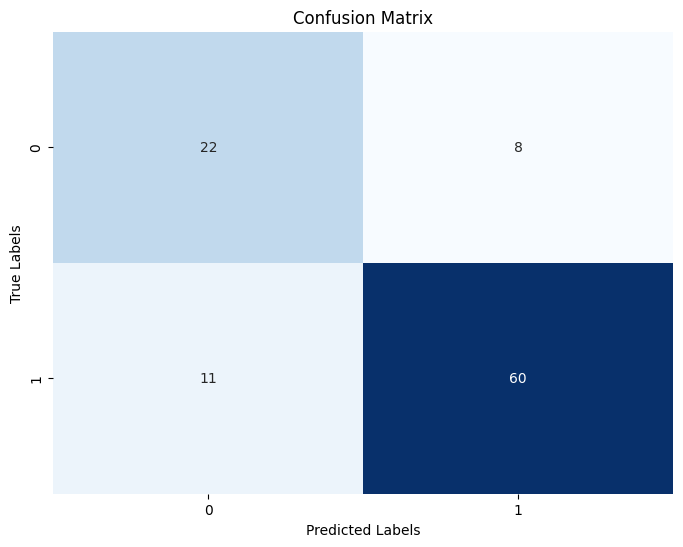


Final Predictions for new resumes:
                                Name  Label Predicted_Label
0                 A Dhanush Aravinth      1        required
1                    A krishna Vamsi      1    not required
2    Abhilash Venkata Sriram Dontula      1        required
3                     Akash Mahanand      1        required
4                            Akash R      0    not required
..                               ...    ...             ...
96              Harsha Vardhan Doddi      0    not required
97          Sai sri kiran dubaguntla      1        required
98                      Saketh Dodda      1        required
99   Swarag Sharma _CB.EN.P2CYS21024      1    not required
100              Tanmayi Doddapaneni      1        required

[101 rows x 3 columns]


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV files
train_file_path = "F:/train.csv"  # Replace with the path to your training data CSV file
new_resumes_file_path = "F:/test.csv"  # Replace with the path to your new resumes data CSV file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Train the model
vectorizer = CountVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train['combined_text'])

# Identify unique labels in the training data
unique_labels_train = set(df_train['Label'])

# Encode labels for the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['Label'])

# Hyperparameter grid for C (regularization parameter)
param_grid = {'C': [0.1, 1, 10]}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameter
best_C = grid_search.best_params_['C']

# Train the final model with the best hyperparameter
final_modelLR = LogisticRegression(C=best_C, max_iter=10000)
final_modelLR.fit(X_train, y_train_encoded)

# Read new resumes data
df_new_resumes = pd.read_csv(new_resumes_file_path)

# Concatenate relevant columns to create feature vectors for new resumes
df_new_resumes['combined_text'] = df_new_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Identify unique labels in the test data
unique_labels_test = set(df_new_resumes['Label'])

# Ensure that the LabelEncoder is fitted on the union of unique labels
all_unique_labels = list(unique_labels_train.union(unique_labels_test))
label_encoder = LabelEncoder()
label_encoder.fit(all_unique_labels)

# Encode labels for the new resumes data using the fitted LabelEncoder
df_new_resumes['Label'] = label_encoder.transform(df_new_resumes['Label'])

# Predict for new resumes
X_new_resumes = vectorizer.transform(df_new_resumes['combined_text'])
new_resumes_predictions = final_modelLR.predict(X_new_resumes)

# Print classification report
print("Classification Report:")
print(classification_report(df_new_resumes['Label'], new_resumes_predictions))

# Create and print the confusion matrix
conf_matrix = confusion_matrix(df_new_resumes['Label'], new_resumes_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Output the final predictions
df_new_resumes['Predicted_Label'] = label_encoder.inverse_transform(new_resumes_predictions)
df_new_resumes[['Name', 'Label', 'Predicted_Label']].to_csv('predictions_logistic_regression.csv', index=False)

# Display the final predictions
print("\nFinal Predictions for new resumes:")
print(df_new_resumes[['Name', 'Label', 'Predicted_Label']])


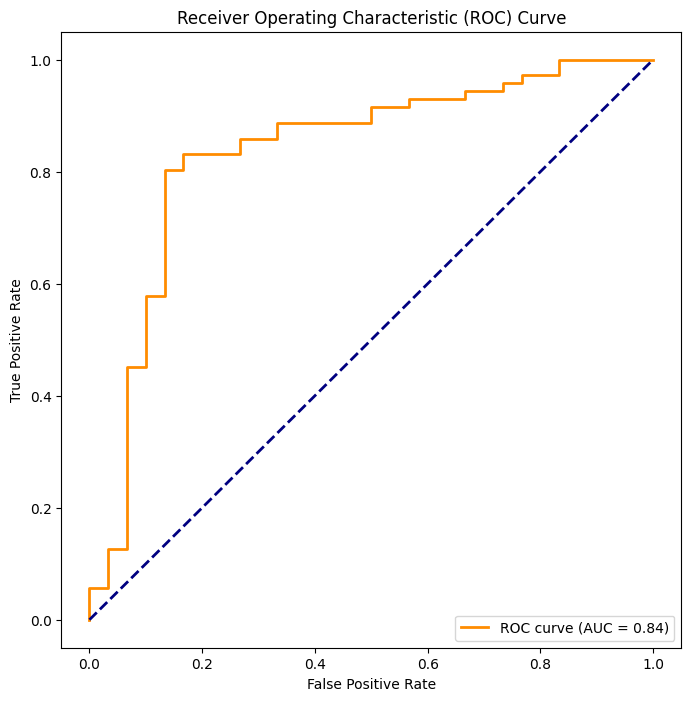

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_scores = final_modelLR.predict_proba(X_new_resumes)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_new_resumes['Label'], y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### SVM

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Read data from CSV files
train_file_path = "train.csv"  # Replace with the path to your training data CSV file
new_resumes_file_path = "test.csv"  # Replace with the path to your new resumes data CSV file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['Label'])

# Train the model
vectorizer = CountVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train['combined_text'])

# Updated hyperparameter grid for C (cost parameter) and kernel
param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

# Train the final model with the best hyperparameters
final_modelSVC = SVC(C=best_C, kernel=best_kernel)
final_modelSVC.fit(X_train, y_train_encoded)

# Save the trained model as a .pkl file
model_filename = 'final_modelSVC.pkl'
joblib.dump(final_modelSVC, model_filename)
print(f"Trained model saved as {model_filename}")




Trained model saved as final_modelSVC.pkl


Trained model loaded from final_modelSVC.pkl
Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

not required       0.75      0.70      0.72        30
    required       0.88      0.90      0.89        71

    accuracy                           0.84       101
   macro avg       0.81      0.80      0.81       101
weighted avg       0.84      0.84      0.84       101



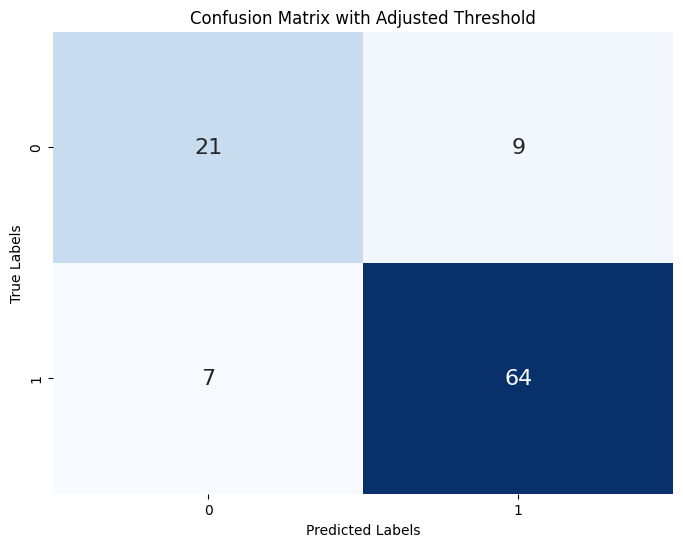

Final Predictions for new resumes with Adjusted Threshold:
                                Name         Label Predicted_Label_Adjusted
0                 A Dhanush Aravinth      required                 required
1                    A krishna Vamsi      required             not required
2    Abhilash Venkata Sriram Dontula      required                 required
3                     Akash Mahanand      required                 required
4                            Akash R  not required             not required
..                               ...           ...                      ...
96              Harsha Vardhan Doddi  not required             not required
97          Sai sri kiran dubaguntla      required                 required
98                      Saketh Dodda      required                 required
99   Swarag Sharma _CB.EN.P2CYS21024      required                 required
100              Tanmayi Doddapaneni      required                 required

[101 rows x 3 columns]


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Read data from CSV files
train_file_path = "train.csv"  # Replace with the path to your training data CSV file
new_resumes_file_path = "test.csv"  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelSVC.pkl'  # Replace with the path to your saved model file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['Label'])

# Load the trained model from the .pkl file
final_modelSVC = joblib.load(model_filename)
print("Trained model loaded from", model_filename)

# Use the original CountVectorizer instance
vectorizer = CountVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train['combined_text'])

# Read new resumes data
df_new_resumes = pd.read_csv(new_resumes_file_path)

# Concatenate relevant columns to create feature vectors for new resumes
df_new_resumes['combined_text'] = df_new_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Transform new data using the original CountVectorizer
X_new_resumes = vectorizer.transform(df_new_resumes['combined_text'])
decision_values = final_modelSVC.decision_function(X_new_resumes)

# Adjusting decision values based on a custom threshold
custom_threshold = 0.0  # Change this threshold as needed
adjusted_predictions = (decision_values > custom_threshold).astype(int)

# Inverse transform the adjusted predictions to get original labels
adjusted_predicted_labels = label_encoder.inverse_transform(adjusted_predictions)

# Print classification report for adjusted predictions
print("Classification Report with Adjusted Threshold:")
print(classification_report(df_new_resumes['Label'], adjusted_predicted_labels))

# Generate confusion matrix for adjusted predictions
conf_matrix = confusion_matrix(df_new_resumes['Label'], adjusted_predicted_labels)

# Plotting confusion matrix as an image with larger font size for values
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Adjusted Threshold')
plt.show()

# Output the final predictions with adjusted threshold
df_new_resumes['Predicted_Label_Adjusted'] = adjusted_predicted_labels
df_new_resumes[['Name', 'Label', 'Predicted_Label_Adjusted']].to_csv('predictions_svm_adjusted.csv', index=False)

# Display the final predictions with adjusted threshold
print("Final Predictions for new resumes with Adjusted Threshold:")
print(df_new_resumes[['Name', 'Label', 'Predicted_Label_Adjusted']])


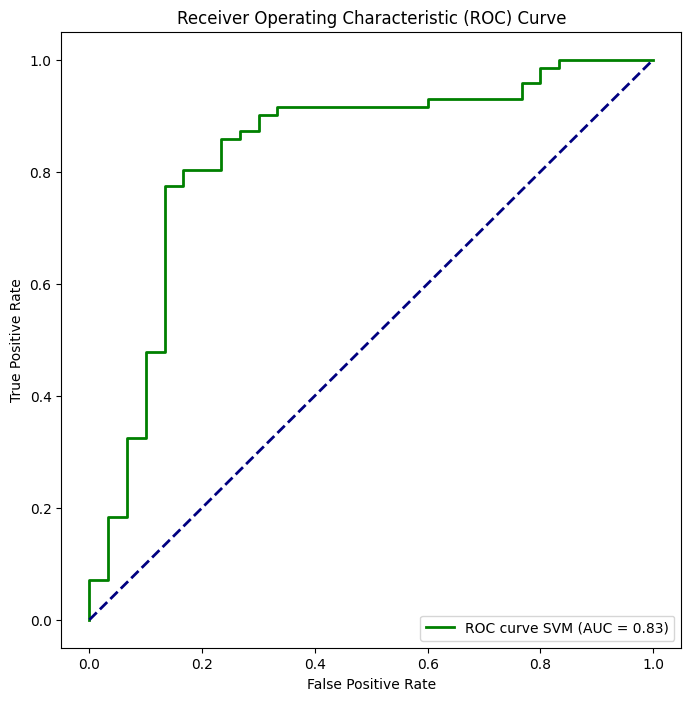

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming df_new_resumes['Label'] contains categorical labels like 'required' and 'not required'
# Map categorical labels to binary labels
label_mapping = {'required': 1, 'not required': 0}
binary_labels = df_new_resumes['Label'].map(label_mapping)

# Get decision function scores for SVM
y_scores_svm = final_modelSVC.decision_function(X_new_resumes)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(binary_labels, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='ROC curve SVM (AUC = {:.2f})'.format(roc_auc_svm))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Naive Bayes

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Read data from CSV files
train_file_path = 'train.csv'  # Replace with the path to your training data CSV file
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Train the model
vectorizer = CountVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train['combined_text'])
y_train = df_train['Label']

# Hyperparameter grid for alpha
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter
best_alpha = grid_search.best_params_['alpha']

# Train the final model with the best hyperparameter
final_modelNB = MultinomialNB(alpha=best_alpha)
final_modelNB.fit(X_train, y_train)

# Save the trained model as a .pkl file
model_filename = 'final_modelNB.pkl'
joblib.dump(final_modelNB, model_filename)
print(f"Trained model saved as {model_filename}")



Trained model saved as final_modelNB.pkl


Naive Bayes model loaded from final_modelNB.pkl
Classification Report:
              precision    recall  f1-score   support

not required       0.73      0.63      0.68        30
    required       0.85      0.90      0.88        71

    accuracy                           0.82       101
   macro avg       0.79      0.77      0.78       101
weighted avg       0.82      0.82      0.82       101



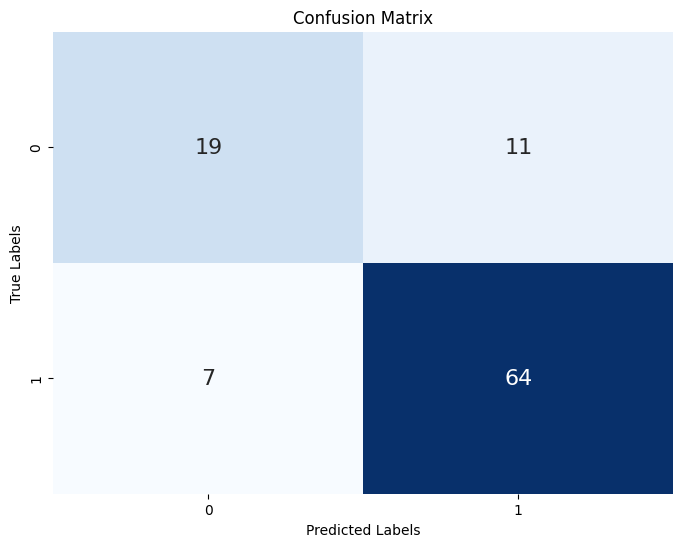

Final Predictions for new resumes:
                                Name         Label Predicted_Label
0                 A Dhanush Aravinth      required        required
1                    A krishna Vamsi      required        required
2    Abhilash Venkata Sriram Dontula      required        required
3                     Akash Mahanand      required        required
4                            Akash R  not required    not required
..                               ...           ...             ...
96              Harsha Vardhan Doddi  not required    not required
97          Sai sri kiran dubaguntla      required        required
98                      Saketh Dodda      required        required
99   Swarag Sharma _CB.EN.P2CYS21024      required        required
100              Tanmayi Doddapaneni      required        required

[101 rows x 3 columns]


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Read data from CSV files
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelNB.pkl'  # Replace with the path to your saved Naive Bayes model file

# Read new resumes data
df_new_resumes = pd.read_csv(new_resumes_file_path)

# Concatenate relevant columns to create feature vectors for new resumes
df_new_resumes['combined_text'] = df_new_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Load the trained Naive Bayes model from the .pkl file
final_modelNB = joblib.load(model_filename)
print("Naive Bayes model loaded from", model_filename)

# Transform new data using the original CountVectorizer
X_new_resumes = vectorizer.transform(df_new_resumes['combined_text'])

# Predict for new resumes
new_resumes_predictions = final_modelNB.predict(X_new_resumes)

# Print classification report
print("Classification Report:")
print(classification_report(df_new_resumes['Label'], new_resumes_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(df_new_resumes['Label'], new_resumes_predictions)

# Plotting confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Output the final predictions
df_new_resumes['Predicted_Label'] = new_resumes_predictions
df_new_resumes[['Name', 'Label', 'Predicted_Label']].to_csv('predictions_nb.csv', index=False)

# Display the final predictions
print("Final Predictions for new resumes:")
print(df_new_resumes[['Name', 'Label', 'Predicted_Label']])


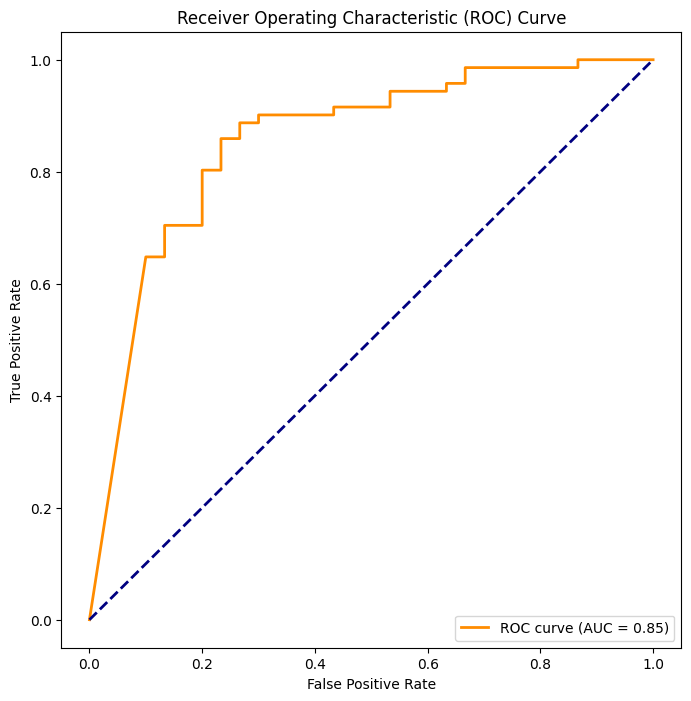

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map categorical labels to binary labels
label_mapping = {'required': 1, 'not required': 0}
binary_labels = df_new_resumes['Label'].map(label_mapping)

# Get predicted probabilities for positive class
y_scores_nb = final_modelNB.predict_proba(X_new_resumes)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(binary_labels, y_scores_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Random Forest

Classification Report:
              precision    recall  f1-score   support

not required       0.75      0.60      0.67        30
    required       0.84      0.92      0.88        71

    accuracy                           0.82       101
   macro avg       0.80      0.76      0.77       101
weighted avg       0.82      0.82      0.82       101



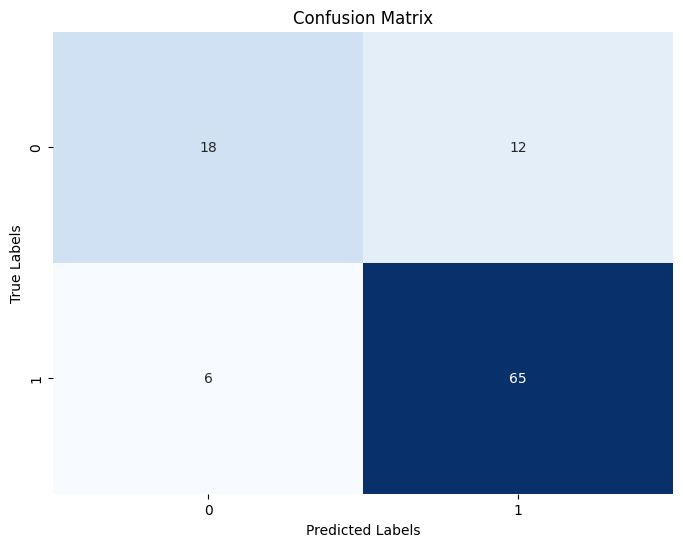

Final Predictions for new resumes:
                                Name         Label Predicted_Label
0                 A Dhanush Aravinth      required        required
1                    A krishna Vamsi      required        required
2    Abhilash Venkata Sriram Dontula      required        required
3                     Akash Mahanand      required        required
4                            Akash R  not required    not required
..                               ...           ...             ...
96              Harsha Vardhan Doddi  not required    not required
97          Sai sri kiran dubaguntla      required        required
98                      Saketh Dodda      required        required
99   Swarag Sharma _CB.EN.P2CYS21024      required        required
100              Tanmayi Doddapaneni      required        required

[101 rows x 3 columns]


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV files
train_file_path = 'F:/train.csv'  # Replace with the path to your training data CSV file
new_resumes_file_path = 'F:/test.csv'  # Replace with the path to your new resumes data CSV file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Train the model
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['combined_text'])
y_train = df_train['Label']

# Hyperparameter grid for the number of trees and maximum depth
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Train the final model with the best hyperparameters
final_modelRFC = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
final_modelRFC.fit(X_train, y_train)

# Read new resumes data
df_new_resumes = pd.read_csv(new_resumes_file_path)

# Concatenate relevant columns to create feature vectors for new resumes
df_new_resumes['combined_text'] = df_new_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Predict for new resumes
X_new_resumes = vectorizer.transform(df_new_resumes['combined_text'])
new_resumes_predictions = final_modelRFC.predict(X_new_resumes)

# Print classification report
print("Classification Report:")
print(classification_report(df_new_resumes['Label'], new_resumes_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(df_new_resumes['Label'], new_resumes_predictions)

# Plotting confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Output the final predictions
df_new_resumes['Predicted_Label'] = new_resumes_predictions
df_new_resumes[['Name', 'Label', 'Predicted_Label']].to_csv('predictions_random_forest.csv', index=False)

# Display the final predictions
print("Final Predictions for new resumes:")
print(df_new_resumes[['Name', 'Label', 'Predicted_Label']])


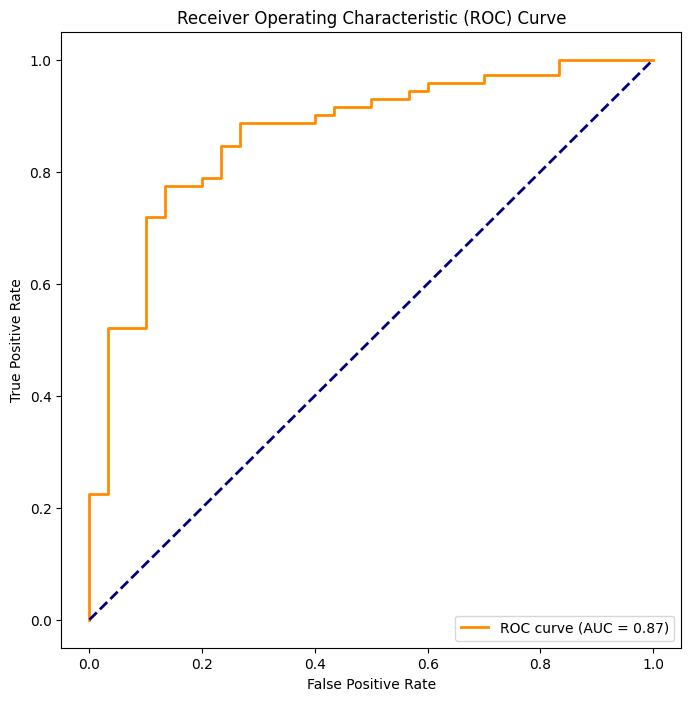

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map categorical labels to binary labels
label_mapping = {'required': 1, 'not required': 0}
binary_labels = df_new_resumes['Label'].map(label_mapping)

# Get predicted probabilities for positive class
y_scores = final_modelRFC.predict_proba(X_new_resumes)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(binary_labels, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### XGBoost

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

# Read data from CSV files
train_file_path = 'train.csv'  # Replace with the path to your training data CSV file
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file

# Read training data
df_train = pd.read_csv(train_file_path)

# Concatenate relevant columns to create feature vectors
df_train['combined_text'] = df_train.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Encode labels
label_encoder = LabelEncoder()
df_train['Label'] = label_encoder.fit_transform(df_train['Label'])

# Train the model
vectorizer = CountVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(df_train['combined_text'])
y_train = df_train['Label']

# Hyperparameter grid for the learning rate and maximum depth
param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']

# Train the final model with the best hyperparameters
final_modelXG = XGBClassifier(learning_rate=best_learning_rate, max_depth=best_max_depth)
final_modelXG.fit(X_train, y_train)


# Save the trained model as a .pkl file
model_filename = 'final_modelXG.pkl'
joblib.dump(final_modelXG, model_filename)
print(f"Trained model saved as {model_filename}")

# Save the fitted vectorizer to a file using joblib
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print("Vectorizer saved to", vectorizer_filename)


Trained model saved as final_modelXG.pkl
Vectorizer saved to vectorizer.pkl


XGBoost model loaded from final_modelXG.pkl
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.88      0.85      0.86        71

    accuracy                           0.81       101
   macro avg       0.77      0.79      0.78       101
weighted avg       0.82      0.81      0.81       101



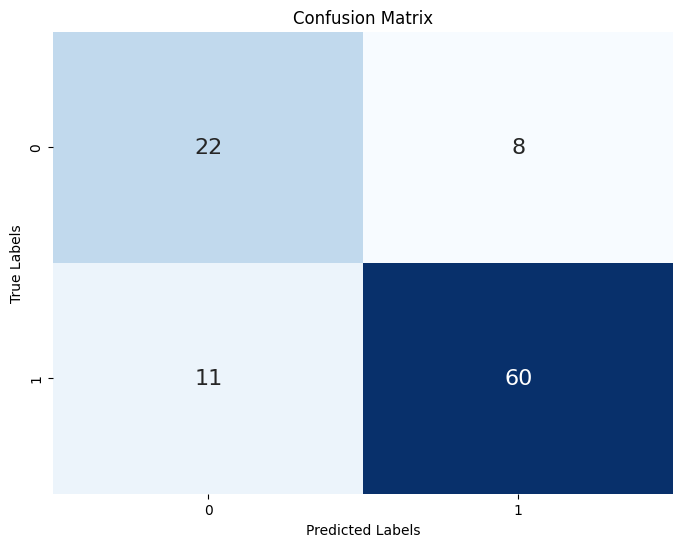

Final Predictions for new resumes:
                                Name  Label  Predicted_Label
0                 A Dhanush Aravinth      1                1
1                    A krishna Vamsi      1                0
2    Abhilash Venkata Sriram Dontula      1                1
3                     Akash Mahanand      1                1
4                            Akash R      0                0
..                               ...    ...              ...
96              Harsha Vardhan Doddi      0                0
97          Sai sri kiran dubaguntla      1                1
98                      Saketh Dodda      1                1
99   Swarag Sharma _CB.EN.P2CYS21024      1                0
100              Tanmayi Doddapaneni      1                1

[101 rows x 3 columns]


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Read data from CSV files
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelXG.pkl'  # Replace with the path to your saved XGBoost model file

# Load the trained XGBoost model from the .pkl file
final_modelXG = joblib.load(model_filename)
print("XGBoost model loaded from", model_filename)

# Read new resumes data
df_new_resumes = pd.read_csv(new_resumes_file_path)

# Concatenate relevant columns to create feature vectors for new resumes
df_new_resumes['combined_text'] = df_new_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

# Encode labels for new resumes
df_new_resumes['Label'] = label_encoder.transform(df_new_resumes['Label'])

# Transform new data using the original CountVectorizer
X_new_resumes = vectorizer.transform(df_new_resumes['combined_text'])

# Predict for new resumes
new_resumes_predictions = final_modelXG.predict(X_new_resumes)

# Print classification report
print("Classification Report:")
print(classification_report(df_new_resumes['Label'], new_resumes_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(df_new_resumes['Label'], new_resumes_predictions)

# Plotting confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Output the final predictions
df_new_resumes['Predicted_Label'] = new_resumes_predictions
df_new_resumes[['Name', 'Label', 'Predicted_Label']].to_csv('predictions_xgboost.csv', index=False)

# Display the final predictions
print("Final Predictions for new resumes:")
print(df_new_resumes[['Name', 'Label', 'Predicted_Label']])


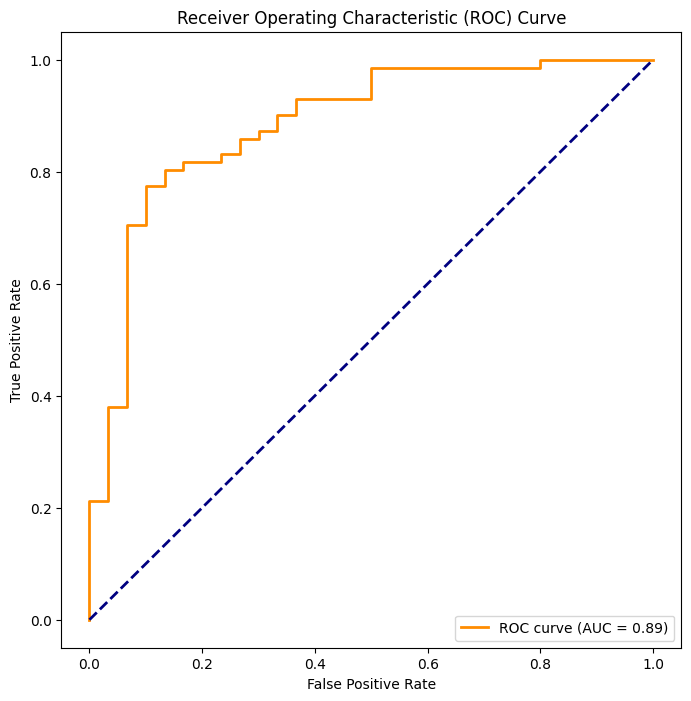

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class
y_scores_xgb = final_modelXG.predict_proba(X_new_resumes)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_new_resumes['Label'], y_scores_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


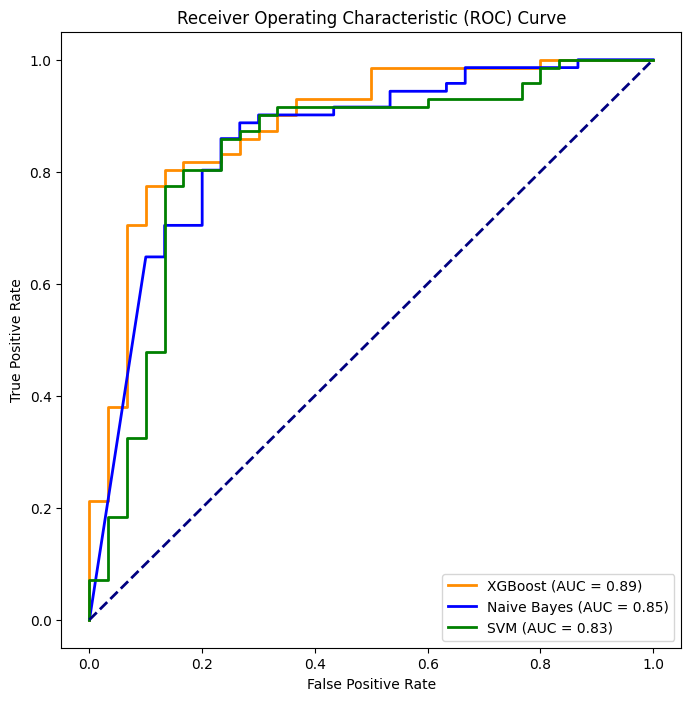

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming df_new_resumes['Label'] contains categorical labels like 'required' and 'not required'
# Map categorical labels to binary labels
label_mapping = {'required': 1, 'not required': 0}
binary_labels = df_new_resumes['Label'].map(label_mapping)

# Get predicted probabilities for XGBoost

fpr_xgb, tpr_xgb, _ = roc_curve(binary_labels, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Get predicted probabilities for Naive Bayes

fpr_nb, tpr_nb, _ = roc_curve(binary_labels, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Get decision function scores for SVM

fpr_svm, tpr_svm, _ = roc_curve(binary_labels, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves in a single graph
plt.figure(figsize=(8, 8))

plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Ranking Algorithm

In [98]:
import re
import csv

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Read input data from the CSV file
input_data_file = "F:/step2.csv"  # Replace with your CSV file path
output_file = "F:/step2_with_scores.csv"  # Replace with your desired output file path

# Example user input with scores as lists
user_input = {
    'TECHNICAL INTERESTS': {'Machine Learning', 'Digital Electronics'},
    'TECHNICAL SKILLS': {'Python', 'Java', 'Cpp'},
    'LANGUAGES': {'English', 'Spanish'},
    'INTERNSHIP': {'Data Science', 'Python'},
    'CERTIFICATIONS': {'Machine Learning', 'Python'},
    }

# Add a new key to user_input combining TECHNICAL INTERESTS and TECHNICAL SKILLS as PROJECTS
user_input['PROJECTS'] = user_input['TECHNICAL INTERESTS'] | user_input['TECHNICAL SKILLS']

# Separate scores into lists
user_input_weights = {
    'TECHNICAL INTERESTS': [5, 4],
    'TECHNICAL SKILLS': [5, 4, 4],
    'LANGUAGES': [5, 4],  # No scores provided
    'INTERNSHIP': [5, 4],
    'CERTIFICATIONS': [5, 4]
}

# Add a new key to user_input combining TECHNICAL INTERESTS and TECHNICAL SKILLS as PROJECTS
user_input_weights['PROJECTS'] = user_input_weights['TECHNICAL INTERESTS'] | user_input_weights['TECHNICAL SKILLS']

# Tokenize user input weights
tokenized_user_input = {
    category: {token: weight for token, weight in zip(tokenize(' '.join(user_input[category])), weights)}
    for category, weights in user_input_weights.items()
}

# Processing CSV file data and writing to a new file with scores
with open(input_data_file, newline='') as csvfile, open(output_file, 'w', newline='') as output_csvfile:
    reader = csv.reader(csvfile)
    writer = csv.writer(output_csvfile)
    headers = next(reader)
    headers.append('SCORE')

    rows = []
    for row in reader:
        row_score = 0
        for idx, data in enumerate(row[1:], start=1):
            category = headers[idx]
            tokens = set(tokenize(data))
            common_tokens = tokens.intersection(tokenized_user_input.get(category, set()))

            if common_tokens:
                weights = tokenized_user_input[category]
                category_score = sum(weights[token] for token in common_tokens if token in weights)
                row_score += category_score

        row.append(row_score)
        rows.append(row)

    # Sort rows by score in descending order
    rows.sort(key=lambda x: x[-1], reverse=True)

    writer.writerow(headers)
    for row in rows:
        writer.writerow(row)

Category Scores:
TECHNICAL INTERESTS: 9
TECHNICAL SKILLS: 5
LANGUAGES: 5
INTERNSHIP: 5
CERTIFICATIONS: 0
PROJECTS: 18
ACHIEVEMENTS & HONORS: 0
EXTRA CURRICULAR ACTIVITIES: 0

Total Score: 42


In [27]:
import re
import csv

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())


def calculate_score(token, weight):
    proficiency_levels = {
        'beginner': 1,
        'intermediate': 2,
        'advanced': 3
    }
    # Extract the proficiency level enclosed within brackets
    match = re.search(r'\((.*?)\)', token)
    if match:
        proficiency = match.group(1).lower()
        if proficiency in proficiency_levels:
            return weight * proficiency_levels[proficiency]
    return weight * 2


# Read input data from the CSV file
input_data_file = 'C:/Users/Vishaline/Downloads/step1.csv'  # Replace with your CSV file path
output_file = "step2_with_scores.csv"  # Replace with your desired output file path

# Example user input with scores as lists
user_input = {
    'TECHNICAL INTERESTS': {'Machine Learning', 'Digital Electronics'},
    'TECHNICAL SKILLS': {'Python', 'Java', 'Cpp'},
    'LANGUAGES': {'English', 'Spanish'},
    'INTERNSHIP': {'Data Science', 'Python'},
    'CERTIFICATIONS': {'Machine Learning', 'Python'},
    }

# Add a new key to user_input combining TECHNICAL INTERESTS and TECHNICAL SKILLS as PROJECTS
user_input['PROJECTS'] = user_input['TECHNICAL INTERESTS'] | user_input['TECHNICAL SKILLS']

# Separate scores into lists
user_input_weights = {
    'TECHNICAL INTERESTS': [5, 4],
    'TECHNICAL SKILLS': [5, 4, 4],
    'LANGUAGES': [5, 4],  # No scores provided
    'INTERNSHIP': [5, 4],
    'CERTIFICATIONS': [5, 4]
}

# Add a new key to user_input combining TECHNICAL INTERESTS and TECHNICAL SKILLS as PROJECTS
user_input_weights['PROJECTS'] = user_input_weights['TECHNICAL INTERESTS'] + user_input_weights['TECHNICAL SKILLS']

# Tokenize user input weights
tokenized_user_input = {
    category: {token: weight for token, weight in zip(tokenize(' '.join(user_input[category])), weights)}
    for category, weights in user_input_weights.items()
}

# Processing CSV file data and writing to a new file with scores
with open(input_data_file, newline='') as csvfile, open(output_file, 'w', newline='') as output_csvfile:
    reader = csv.reader(csvfile)
    writer = csv.writer(output_csvfile)
    headers = next(reader)
    headers.append('SCORE')

    rows = []
    for row in reader:
        row_score = 0
        for idx, data in enumerate(row[1:], start=1):
            category = headers[idx]
            tokens = set(tokenize(data))
            common_tokens = tokens.intersection(tokenized_user_input.get(category, set()))

            if common_tokens:
                weights = tokenized_user_input[category]
                category_score = sum(calculate_score(token, weights[token]) for token in common_tokens if token in weights)
                row_score += category_score

        row.append(row_score)
        rows.append(row)

    # Sort rows by score in descending order
    rows.sort(key=lambda x: x[-1], reverse=True)

    writer.writerow(headers)
    for row in rows:
        writer.writerow(row)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Read data from CSV files
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelXG.pkl'  # Replace with the path to your saved XGBoost model file
vectorizer_filename = 'vectorizer.pkl'  # Replace with the path to your saved CountVectorizer file

# Load the trained XGBoost model from the .pkl file
final_modelXG = joblib.load(model_filename)
print("XGBoost model loaded from", model_filename)

# Load the CountVectorizer from the .pkl file
vectorizer = joblib.load(vectorizer_filename)
print("CountVectorizer loaded from", vectorizer_filename)

# Modify the code to plot time taken for prediction along with other evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
time_taken_list = []

for num_instances in range(10, 101, 10):
    # Read new subset of resumes data
    df_subset_resumes = pd.read_csv(new_resumes_file_path, nrows=num_instances)
    # Create a mapping dictionary
    label_mapping = {'required': 1, 'not required': 0}

    # Assuming you have a DataFrame df with a column named 'Label' containing the labels
    df_subset_resumes['Label'] = df_subset_resumes['Label'].map(label_mapping)
    # Concatenate relevant columns to create feature vectors for new subset of resumes
    df_subset_resumes['combined_text'] = df_subset_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

    # Transform new subset of data using the loaded CountVectorizer
    X_subset_resumes = vectorizer.transform(df_subset_resumes['combined_text'])

    # Predict for new subset of resumes and measure time taken
    start_time = time.time()
    subset_resumes_predictions = final_modelXG.predict(X_subset_resumes)
    end_time = time.time()
    time_taken = end_time - start_time
    time_taken_list.append(time_taken)

    # Calculate evaluation metrics for the subset
    accuracy = (subset_resumes_predictions == df_subset_resumes['Label']).mean()
    accuracy_list.append(accuracy)

    report = classification_report(df_subset_resumes['Label'], subset_resumes_predictions, output_dict=True)
    precision_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])
    f1_score_list.append(report['1']['f1-score'])

    print(f"Evaluation metrics for {num_instances} instances:")
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("F1 Score:", report['1']['f1-score'])
    print("Time taken for prediction:", time_taken, "seconds")
    print()

# Plotting evaluation metrics and time taken vs. number of instances
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101, 10), accuracy_list, marker='o', linestyle='-', label='Accuracy')
plt.plot(range(10, 101, 10), precision_list, marker='o', linestyle='-', label='Precision')
plt.plot(range(10, 101, 10), recall_list, marker='o', linestyle='-', label='Recall')
plt.plot(range(10, 101, 10), f1_score_list, marker='o', linestyle='-', label='F1 Score')
plt.xlabel('Number of Instances')
plt.ylabel('Metrics')
plt.title('Evaluation Metrics vs. Number of Instances')
plt.legend()
plt.grid(True)
plt.show()


# Plotting time taken for prediction vs. number of instances
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101, 10), time_taken_list, marker='o', linestyle='-')
plt.xlabel('Number of Instances')
plt.ylabel('Time Taken for Prediction (seconds)')
plt.title('Time Taken for Prediction vs. Number of Instances')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

XGBoost model loaded from final_modelXG.pkl
CountVectorizer loaded from vectorizer.pkl
Evaluation metrics for 10 instances:
Accuracy: 0.8
Precision: 0.8333333333333334
F1 Score: 0.8333333333333334
Time taken for prediction: 0.038123130798339844 seconds

Evaluation metrics for 20 instances:
Accuracy: 0.75
Precision: 0.8461538461538461
F1 Score: 0.8148148148148148
Time taken for prediction: 0.0 seconds

Evaluation metrics for 30 instances:
Accuracy: 0.7333333333333333
Precision: 0.8235294117647058
F1 Score: 0.7777777777777778
Time taken for prediction: 0.0 seconds

Evaluation metrics for 40 instances:
Accuracy: 0.75
Precision: 0.782608695652174
F1 Score: 0.782608695652174
Time taken for prediction: 0.015627622604370117 seconds

Evaluation metrics for 50 instances:
Accuracy: 0.72
Precision: 0.7586206896551724
F1 Score: 0.7586206896551724
Time taken for prediction: 0.0 seconds

Evaluation metrics for 60 instances:
Accuracy: 0.7666666666666667
Precision: 0.8157894736842105
F1 Score: 0.81578

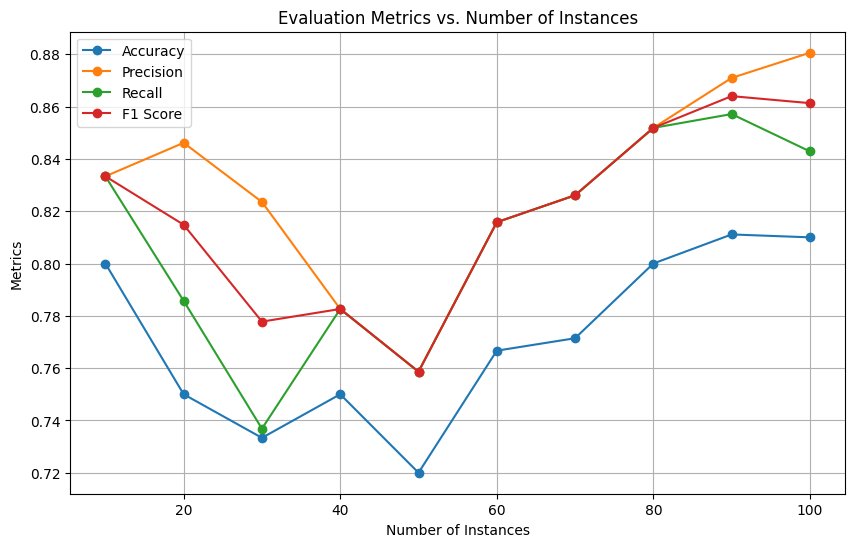

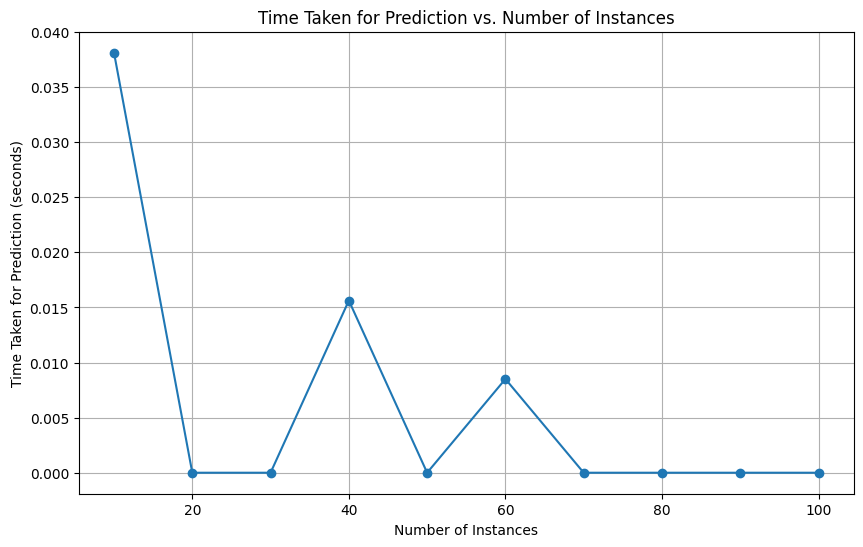

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Read data from CSV files
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelXG.pkl'  # Replace with the path to your saved XGBoost model file
vectorizer_filename = 'vectorizer.pkl'  # Replace with the path to your saved CountVectorizer file

# Load the trained XGBoost model from the .pkl file
final_modelXG = joblib.load(model_filename)
print("XGBoost model loaded from", model_filename)

# Load the CountVectorizer from the .pkl file
vectorizer = joblib.load(vectorizer_filename)
print("CountVectorizer loaded from", vectorizer_filename)

# Modify the code to plot time taken for prediction along with other evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
time_taken_list = []

for num_instances in range(10, 101, 10):
    # Read new subset of resumes data
    df_subset_resumes = pd.read_csv(new_resumes_file_path, nrows=num_instances)
    # Create a mapping dictionary
    label_mapping = {'required': 1, 'not required': 0}

    # Assuming you have a DataFrame df with a column named 'Label' containing the labels
    df_subset_resumes['Label'] = df_subset_resumes['Label'].map(label_mapping)
    # Concatenate relevant columns to create feature vectors for new subset of resumes
    df_subset_resumes['combined_text'] = df_subset_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

    # Transform new subset of data using the loaded CountVectorizer
    X_subset_resumes = vectorizer.transform(df_subset_resumes['combined_text'])

    # Predict for new subset of resumes and measure time taken
    start_time = time.time()
    subset_resumes_predictions = final_modelXG.predict(X_subset_resumes)
    end_time = time.time()
    time_taken = end_time - start_time
    time_taken_list.append(time_taken)

    # Calculate evaluation metrics for the subset
    accuracy = (subset_resumes_predictions == df_subset_resumes['Label']).mean()
    accuracy_list.append(accuracy)

    report = classification_report(df_subset_resumes['Label'], subset_resumes_predictions, output_dict=True)
    precision_list.append(report['1']['precision'])
    recall_list.append(report['1']['recall'])
    f1_score_list.append(report['1']['f1-score'])

    print(f"Evaluation metrics for {num_instances} instances:")
    print("Accuracy:", accuracy)
    print("Precision:", report['1']['precision'])
    print("F1 Score:", report['1']['f1-score'])
    print("Time taken for prediction:", time_taken, "seconds")
    print()

# Plotting evaluation metrics and time taken vs. number of instances
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101, 10), accuracy_list, marker='o', linestyle='-', label='Accuracy')
plt.plot(range(10, 101, 10), precision_list, marker='o', linestyle='-', label='Precision')
plt.plot(range(10, 101, 10), recall_list, marker='o', linestyle='-', label='Recall')
plt.plot(range(10, 101, 10), f1_score_list, marker='o', linestyle='-', label='F1 Score')
plt.xlabel('Number of Instances')
plt.ylabel('Metrics')
plt.title('Evaluation Metrics vs. Number of Instances')
plt.legend()
plt.grid(True)
plt.show()


# Plotting time taken for prediction vs. number of instances
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101, 10), time_taken_list, marker='o', linestyle='-')
plt.xlabel('Number of Instances')
plt.ylabel('Time Taken for Prediction (seconds)')
plt.title('Time Taken for Prediction vs. Number of Instances')
plt.grid(True)
plt.show()

XGBoost model loaded from final_modelXG.pkl
CountVectorizer loaded from vectorizer.pkl


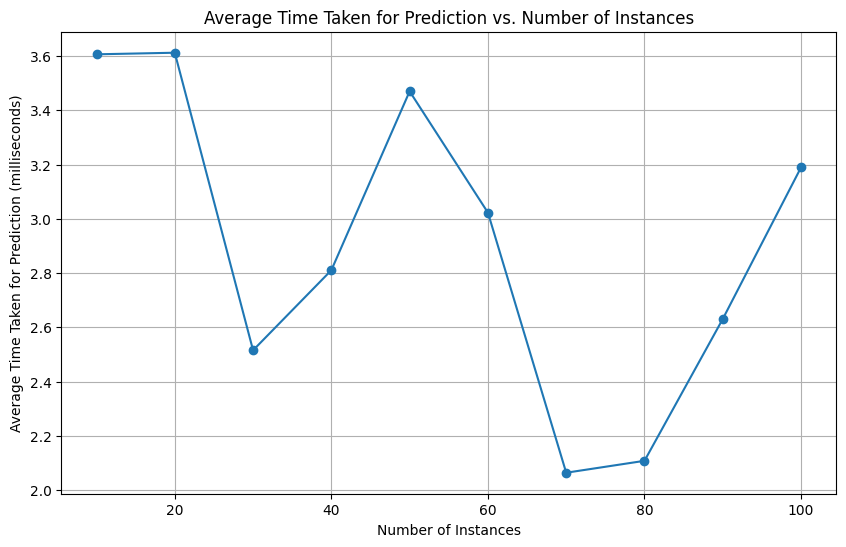

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib
import time

# Read data from CSV files
new_resumes_file_path = 'test.csv'  # Replace with the path to your new resumes data CSV file
model_filename = 'final_modelXG.pkl'  # Replace with the path to your saved XGBoost model file
vectorizer_filename = 'vectorizer.pkl'  # Replace with the path to your saved CountVectorizer file

# Load the trained XGBoost model from the .pkl file
final_modelXG = joblib.load(model_filename)
print("XGBoost model loaded from", model_filename)

# Load the CountVectorizer from the .pkl file
vectorizer = joblib.load(vectorizer_filename)
print("CountVectorizer loaded from", vectorizer_filename)

# Modify the code to plot time taken for prediction along with other evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
time_taken_list = []

for _ in range(100):
    time_taken_per_run = []

    for num_instances in range(10, 101, 10):
        # Read new subset of resumes data
        df_subset_resumes = pd.read_csv(new_resumes_file_path, nrows=num_instances)
        # Create a mapping dictionary
        label_mapping = {'required': 1, 'not required': 0}

        # Assuming you have a DataFrame df with a column named 'Label' containing the labels
        df_subset_resumes['Label'] = df_subset_resumes['Label'].map(label_mapping)
        # Concatenate relevant columns to create feature vectors for new subset of resumes
        df_subset_resumes['combined_text'] = df_subset_resumes.apply(lambda row: ' '.join(map(str, row.drop(['Label', 'Name']))), axis=1)

        # Transform new subset of data using the loaded CountVectorizer
        X_subset_resumes = vectorizer.transform(df_subset_resumes['combined_text'])

        # Predict for new subset of resumes and measure time taken
        start_time = time.time()
        subset_resumes_predictions = final_modelXG.predict(X_subset_resumes)
        end_time = time.time()
        time_taken = end_time - start_time
        time_taken_per_run.append(time_taken)

        # Calculate evaluation metrics for the subset
        accuracy = (subset_resumes_predictions == df_subset_resumes['Label']).mean()
        accuracy_list.append(accuracy)

        report = classification_report(df_subset_resumes['Label'], subset_resumes_predictions, output_dict=True)
        precision_list.append(report['1']['precision'])
        recall_list.append(report['1']['recall'])
        f1_score_list.append(report['1']['f1-score'])

    time_taken_list.append(time_taken_per_run)

# Calculate average time taken for prediction across 10 runs
average_time_taken = [sum(times) / len(times) for times in zip(*time_taken_list)]
# Convert average time taken for prediction from seconds to milliseconds
average_time_taken_ms = [time * 1000 for time in average_time_taken]

# Plotting average time taken for prediction vs. number of instances in milliseconds
plt.figure(figsize=(10, 6))
plt.plot(range(10, 101, 10), average_time_taken_ms, marker='o', linestyle='-')
plt.xlabel('Number of Instances')
plt.ylabel('Average Time Taken for Prediction (milliseconds)')
plt.title('Average Time Taken for Prediction vs. Number of Instances')
plt.grid(True)
plt.show()
